In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, SimpleRNN, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [31]:
data= pd.read_csv('mon1.csv')

X = data[['TP1', 'TP2', 'TP3']].copy() 
X.loc[:, 'TP1'] = X['TP1'] * 0.10
X.loc[:, 'TP2'] = X['TP2'] * 0.10
X.loc[:, 'TP3'] = X['TP3'] * 0.20
y = data['CK'].copy()
y = y * 0.6
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [33]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, reshape_input=None):
    if reshape_input=='cnn':
        X_train = np.expand_dims(X_train, axis=-1) 
        X_val = np.expand_dims(X_val, axis=-1)  
        X_test = np.expand_dims(X_test, axis=-1)
    elif reshape_input=='rnn':
        X_train = np.expand_dims(X_train, axis=1) 
        X_val = np.expand_dims(X_val, axis=1)  
        X_test = np.expand_dims(X_test, axis=1)
    
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    predicted = model.predict(X_test)
    y_test_pred = predicted.flatten()
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse, history, predicted

In [35]:
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(100, activation='relu'),      
    Dropout(0.5),                      
    Dense(100, activation='relu'),     
    Dropout(0.5),                      
    Dense(16, activation='relu'),       
    Dense(1, activation='linear')      
])

mlp_mae, mlp_mse, mlp_rmse, mlp_history, predicted_mlp  = evaluate_model(mlp_model, X_train, y_train, X_val, y_val, X_test, y_test)                 

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.5390 - mae: 2.6617 - val_loss: 1.1125 - val_mae: 0.8718
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6570 - mae: 1.0298 - val_loss: 1.0097 - val_mae: 0.8488
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4365 - mae: 0.9856 - val_loss: 1.0454 - val_mae: 0.8570
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3482 - mae: 0.9532 - val_loss: 1.0287 - val_mae: 0.8525
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2227 - mae: 0.9167 - val_loss: 1.0029 - val_mae: 0.8463
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2925 - mae: 0.9475 - val_loss: 0.9091 - val_mae: 0.8257
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1738 - mae: 0.8957 - val_loss: 0.9957 - val_mae: 0.8435
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1668 - mae: 0.8999 - val_loss: 0.9287 - val_mae: 0.8279
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1621 - mae: 

In [36]:
cnn_model = Sequential([
    Input(shape=(1, 3, 1)),                                  
    Conv2D(64, (1, 2), activation='relu', padding='same'),  
    MaxPooling2D((1, 1)),                                  
    Conv2D(32, (1, 2), activation='relu', padding='same'),
    MaxPooling2D((1, 1)),                                  
    Flatten(),                                             
    Dense(100, activation='relu'),                         
    Dense(1, activation='linear')                          
])

cnn_mae, cnn_mse, cnn_rmse, cnn_history, predicted_cnn = evaluate_model(cnn_model, X_train, y_train, X_val, y_val, X_test, y_test,'cnn')


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.4834 - mae: 2.8660 - val_loss: 1.0074 - val_mae: 0.8505
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1024 - mae: 0.8729 - val_loss: 0.9057 - val_mae: 0.8176
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8788 - mae: 0.7979 - val_loss: 0.9120 - val_mae: 0.8199
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9025 - mae: 0.8117 - val_loss: 0.8925 - val_mae: 0.8158
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8624 - mae: 0.7941 - val_loss: 0.8858 - val_mae: 0.8146
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8776 - mae: 0.8078 - val_loss: 0.8824 - val_mae: 0.8151
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8732 - mae: 0.7965 - val_loss: 0.8787 - val_mae: 0.8136
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9093 - mae: 0.8238 - val_loss: 0.8752 - val_mae: 0.8131
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8953 - mae: 

In [37]:
rnn_model = Sequential([
    Input(shape=(1, 3)), 
    SimpleRNN(50, activation='tanh'),     
    Dense(100, activation='relu'),        
    Dropout(0.5),                       
    Dense(50, activation='relu'),      
    Dropout(0.5),                         
    Dense(1, activation='linear')          
])

rnn_mae, rnn_mse, rnn_rmse, rnn_history, predicted_rnn = evaluate_model(rnn_model, X_train, y_train, X_val, y_val, X_test, y_test,'rnn')

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.1904 - mae: 2.5573 - val_loss: 1.1533 - val_mae: 0.8925
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0601 - mae: 1.1548 - val_loss: 1.1544 - val_mae: 0.8903
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1210 - mae: 1.1965 - val_loss: 1.0810 - val_mae: 0.8663
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7139 - mae: 1.0773 - val_loss: 1.0791 - val_mae: 0.8646
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7267 - mae: 1.0800 - val_loss: 1.0179 - val_mae: 0.8491
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5207 - mae: 1.0027 - val_loss: 1.0191 - val_mae: 0.8482
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6289 - mae: 1.0448 - val_loss: 1.0142 - val_mae: 0.8480
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5242 - mae: 1.0067 - val_loss: 0.9200 - val_mae: 0.8252
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5194 - mae: 

In [38]:
from tensorflow.keras.layers import LSTM
lstm_model = Sequential([
    Input(shape=(1, 3)), 
    LSTM(100, activation='tanh'),       
    Dense(100, activation='relu'),        
    Dropout(0.5),                         
    Dense(50, activation='relu'),        
    Dropout(0.5),                        
    Dense(1, activation='linear')     
])
lstm_mae, lstm_mse, lstm_rmse, lstm_history, predicted_lstm = evaluate_model(lstm_model, X_train, y_train, X_val, y_val, X_test, y_test,'rnn')

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.4203 - mae: 2.8408 - val_loss: 1.0778 - val_mae: 0.8634
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8977 - mae: 1.0996 - val_loss: 0.9583 - val_mae: 0.8303
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8347 - mae: 1.0903 - val_loss: 0.9561 - val_mae: 0.8321
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5054 - mae: 0.9874 - val_loss: 0.9386 - val_mae: 0.8275
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4676 - mae: 0.9933 - val_loss: 0.9198 - val_mae: 0.8237
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4970 - mae: 0.9979 - val_loss: 0.8749 - val_mae: 0.8123
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3310 - mae: 0.9420 - val_loss: 0.9819 - val_mae: 0.8379
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4866 - mae: 1.0058 - val_loss: 0.8881 - val_mae: 0.8150
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5456 - mae: 

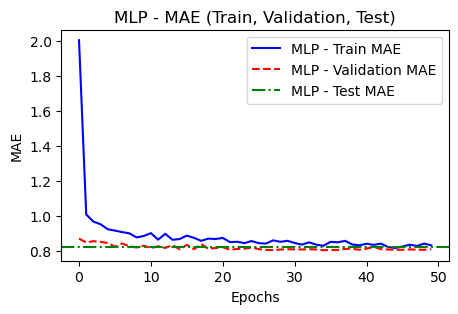

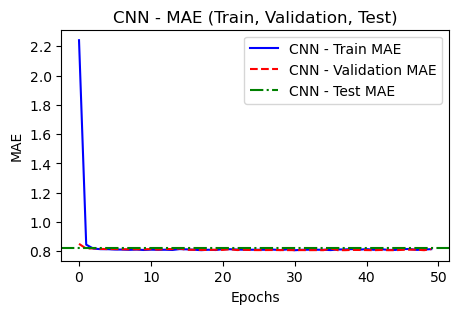

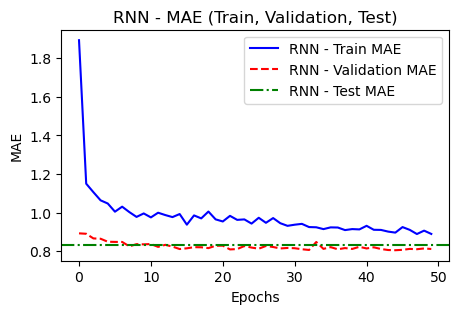

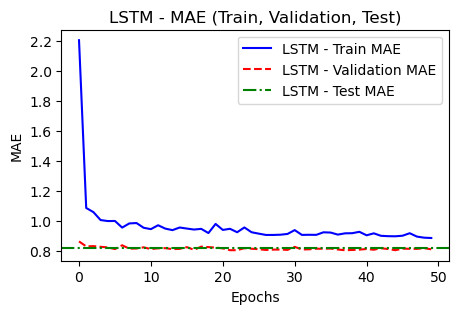

In [39]:
# Vẽ MAE cho Train, Validation, và Test
import matplotlib.pyplot as plt
def plot_mae_train_val_test(history, test_mae, model_name):
    plt.figure(figsize=(5, 3))
    # MAE cho train, validation và test
    plt.plot(history.history['mae'], label=f'{model_name} - Train MAE', color='blue')
    plt.plot(history.history['val_mae'], label=f'{model_name} - Validation MAE', color='red', linestyle='--')
    plt.axhline(test_mae, label=f'{model_name} - Test MAE', color='green', linestyle='-.')  # Test MAE
    plt.title(f'{model_name} - MAE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

plot_mae_train_val_test(mlp_history, mlp_mae, 'MLP')
plot_mae_train_val_test(cnn_history, cnn_mae, 'CNN')
plot_mae_train_val_test(rnn_history, rnn_mae, 'RNN')
plot_mae_train_val_test(lstm_history, lstm_mae, 'LSTM')


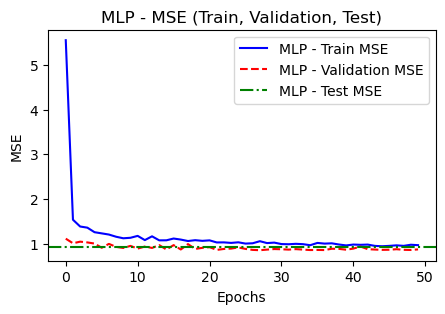

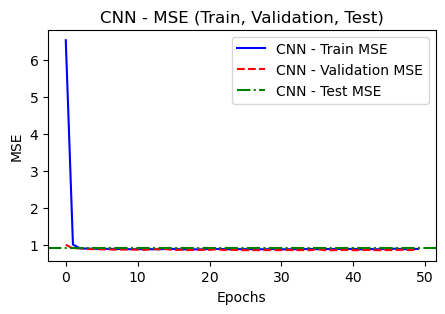

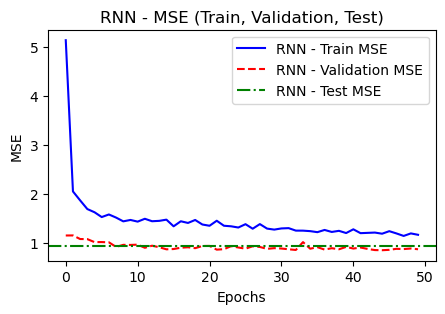

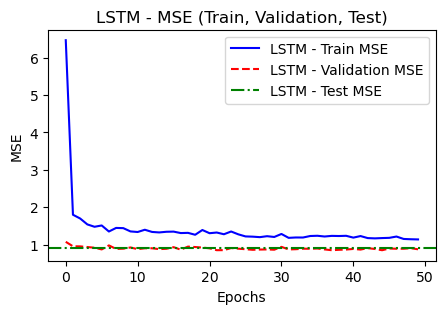

In [40]:
# Vẽ MSE (Loss) cho Train, Validation, và Test
def plot_mse_train_val_test(history, test_mse, model_name):
    plt.figure(figsize=(5, 3))
    # MSE cho train, validation và test
    plt.plot(history.history['loss'], label=f'{model_name} - Train MSE', color='blue')
    plt.plot(history.history['val_loss'], label=f'{model_name} - Validation MSE', color='red', linestyle='--')
    plt.axhline(test_mse, label=f'{model_name} - Test MSE', color='green', linestyle='-.')  # Test MSE
    plt.title(f'{model_name} - MSE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Vẽ MSE cho từng mô hình (MLP, CNN, RNN, LSTM)
plot_mse_train_val_test(mlp_history, mlp_mse, 'MLP')
plot_mse_train_val_test(cnn_history, cnn_mse, 'CNN')
plot_mse_train_val_test(rnn_history, rnn_mse, 'RNN')
plot_mse_train_val_test(lstm_history, lstm_mse, 'LSTM')


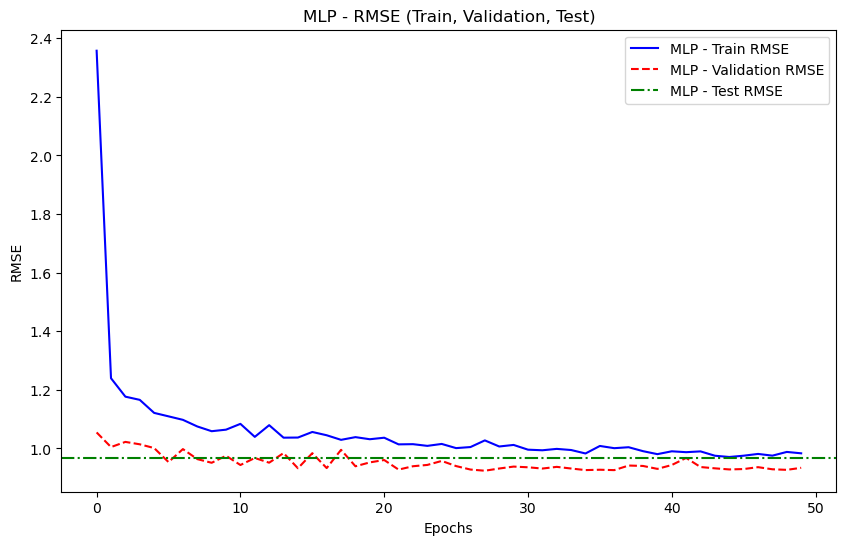

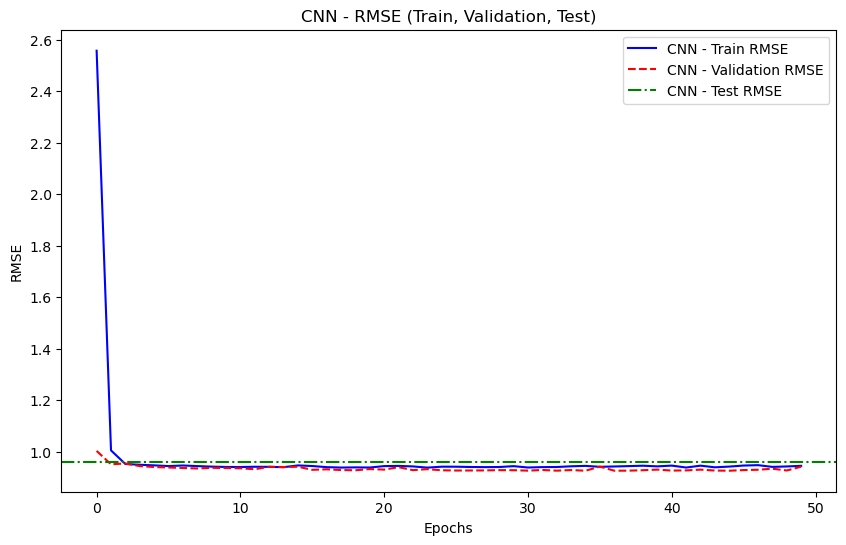

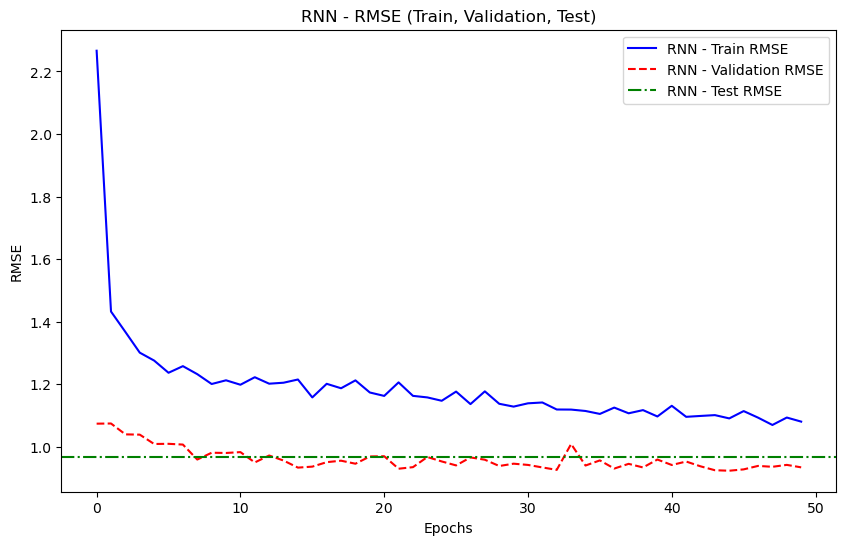

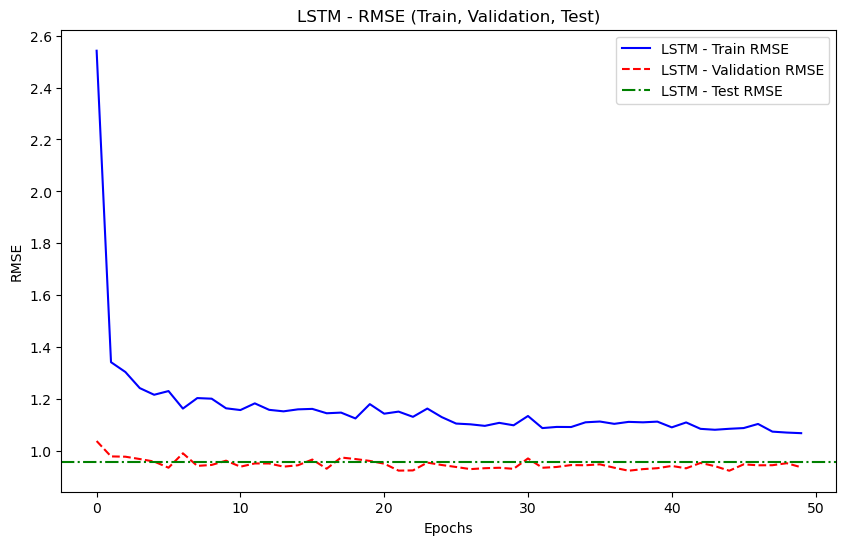

In [41]:
# Vẽ RMSE cho Train, Validation, và Test
def plot_rmse_train_val_test(history, test_rmse, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.sqrt(np.array(history.history['loss'])), label=f'{model_name} - Train RMSE', color='blue')
    plt.plot(np.sqrt(np.array(history.history['val_loss'])), label=f'{model_name} - Validation RMSE', color='red', linestyle='--')
    plt.axhline(test_rmse, label=f'{model_name} - Test RMSE', color='green', linestyle='-.')  # Test RMSE
    plt.title(f'{model_name} - RMSE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_rmse_train_val_test(mlp_history, np.sqrt(mlp_mse), 'MLP')
plot_rmse_train_val_test(cnn_history, np.sqrt(cnn_mse), 'CNN')
plot_rmse_train_val_test(rnn_history, np.sqrt(rnn_mse), 'RNN')
plot_rmse_train_val_test(lstm_history, np.sqrt(lstm_mse), 'LSTM')


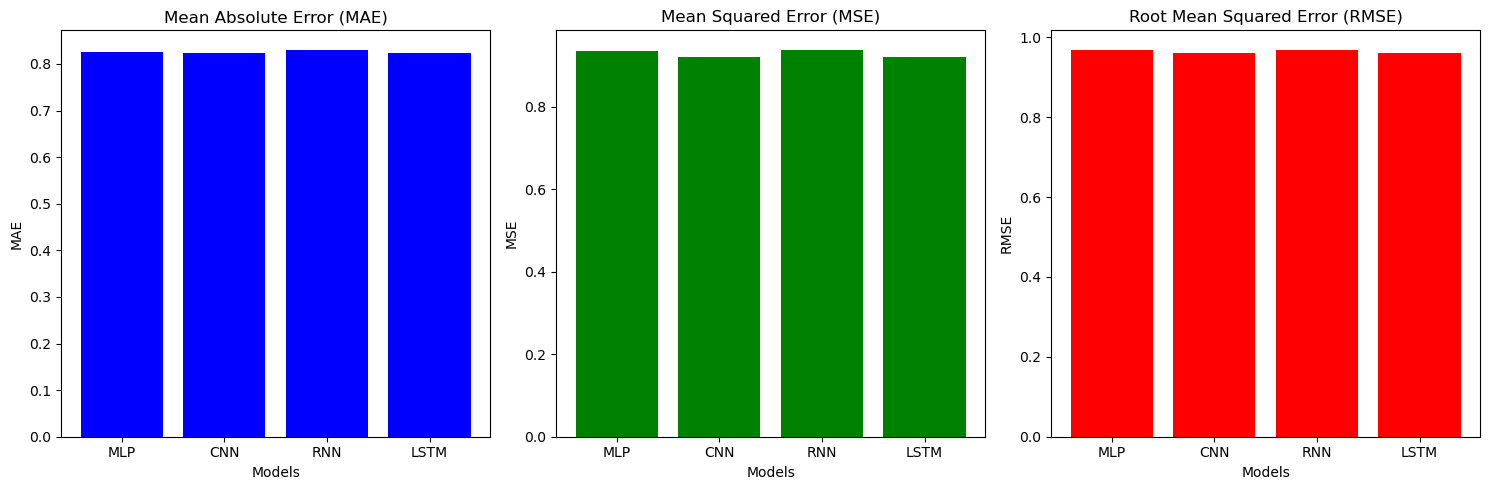

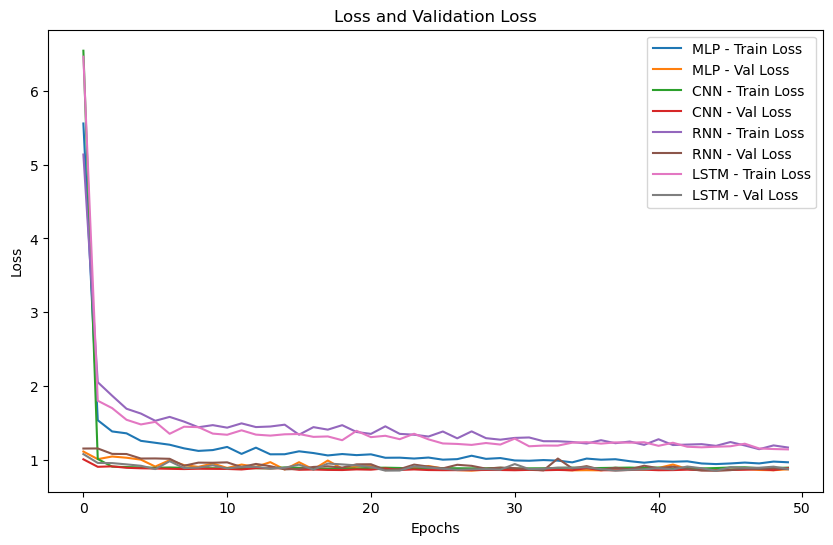

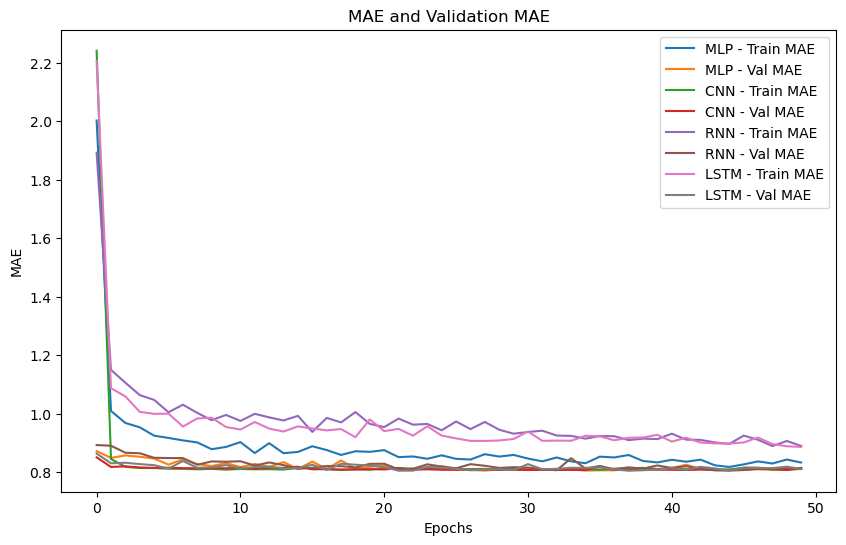

In [42]:


# Dữ liệu MAE, MSE, RMSE từ các mô hình
models = ['MLP', 'CNN', 'RNN', 'LSTM']
mae_values = [mlp_mae, cnn_mae, rnn_mae, lstm_mae]
mse_values = [mlp_mse, cnn_mse, rnn_mse, lstm_mse]
rmse_values = [mlp_rmse, cnn_rmse, rnn_rmse, lstm_rmse]

# So sánh MAE, MSE, RMSE giữa các mô hình
plt.figure(figsize=(15, 5))

# Biểu đồ MAE
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')

# Biểu đồ MSE
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color='green')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')

# Biểu đồ RMSE
plt.subplot(1, 3, 3)
plt.bar(models, rmse_values, color='red')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Vẽ đồ thị loss và val_loss cho từng mô hình
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label=f'{model_name} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} - Val Loss')

plt.figure(figsize=(10, 6))
plot_loss(mlp_history, 'MLP')
plot_loss(cnn_history, 'CNN')
plot_loss(rnn_history, 'RNN')
plot_loss(lstm_history, 'LSTM')

plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị MAE cho các mô hình
def plot_mae(history, model_name):
    plt.plot(history.history['mae'], label=f'{model_name} - Train MAE')
    plt.plot(history.history['val_mae'], label=f'{model_name} - Val MAE')

plt.figure(figsize=(10, 6))
plot_mae(mlp_history, 'MLP')
plot_mae(cnn_history, 'CNN')
plot_mae(rnn_history, 'RNN')
plot_mae(lstm_history, 'LSTM')

plt.title('MAE and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



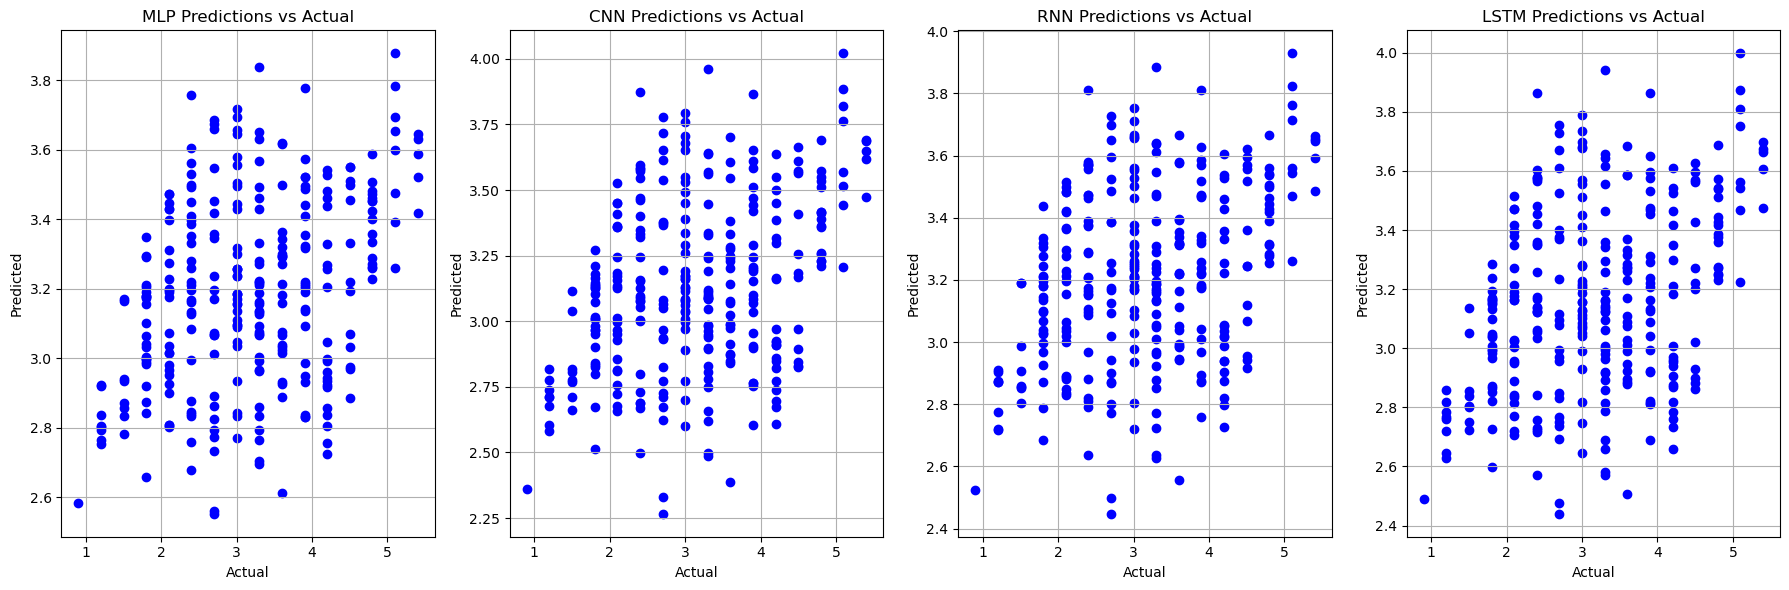

In [43]:
import matplotlib.pyplot as plt

# Dữ liệu thực tế
actual_values = y_test 

# Vẽ biểu đồ phân tán cho các mô hình
plt.figure(figsize=(18, 6))

# MLP - Vẽ ở cột 1
plt.subplot(1, 4, 1)
plt.scatter(actual_values, predicted_mlp, color='blue')
plt.title('MLP Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# CNN - Vẽ ở cột 2
plt.subplot(1, 4, 2)
plt.scatter(actual_values, predicted_cnn, color='blue')
plt.title('CNN Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# RNN - Vẽ ở cột 3
plt.subplot(1, 4, 3)
plt.scatter(actual_values, predicted_rnn, color='blue')
plt.title('RNN Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# LSTM - Vẽ ở cột 4
plt.subplot(1, 4, 4)
plt.scatter(actual_values, predicted_lstm, color='blue')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
